## Example Single Variable Function to Minimize

Here, I will show how we can use gradient descent to minimize a simple sinusoidal function, and then use it to optimize for a multivariate function. 

Our cubic is of the form: 

$$

f(x) = sin(x)

$$

From calculus and trigonometry, we know there is a local minimum at $$ x = \frac{3\pi}{2} $$. First, let's make a reasonable guess as to where the minimum would be. I'll start by saying $$ x_0 = 5.9 $$. Let's all define our gradient function generally, which is the first derivative of $$ \cos (x) $$. 


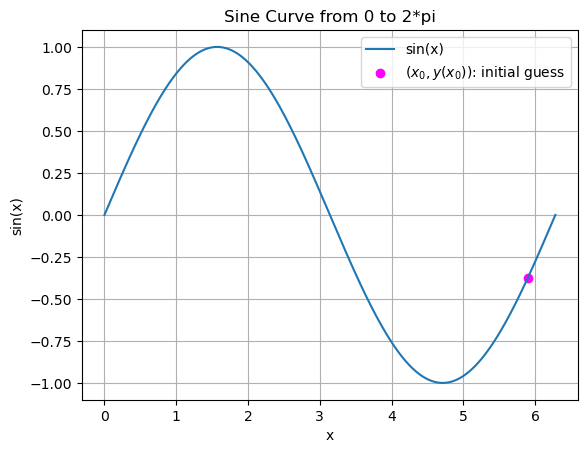

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate values for x from 0 to 2*pi
x = np.linspace(0, 2*np.pi, 1000)

# Calculate corresponding y values using the sine function
y = np.sin(x)
def f(i):
    return np.sin(i) 

# Plot the sine curve
plt.plot(x, y, label='sin(x)')
plt.title('Sine Curve from 0 to 2*pi')
plt.scatter(5.9, f(5.9), color = "magenta", label = "$(x_0, y(x_0))$: initial guess")
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.grid(True)
plt.legend()
plt.show()


Ok, now we have an idea of where our descent needs to happen-- in the opposite direction of the derivative. We can generally define the gradient descent update rule as: 
$$ 
w_{n+1} = w_{n} - \alpha f'(w_{n})
$$
where $$ \alpha $$ is the learning rate. 

[5.9        5.71450431 5.54598191 5.39791163 5.2712961  5.16524411
 5.07773718 5.00628227 4.94834612 4.90159138 4.86397626 4.83377478
 4.8095572  4.79015412 4.77461676 4.76217924 4.7522253  4.74426014
 4.73788699 4.73278794 4.72870843 4.72544469 4.72283362 4.72074473
 4.7190736  4.71773669 4.71666715 4.71581152 4.71512701 4.71457941
 4.71414132 4.71379085 4.71351048 4.71328618]


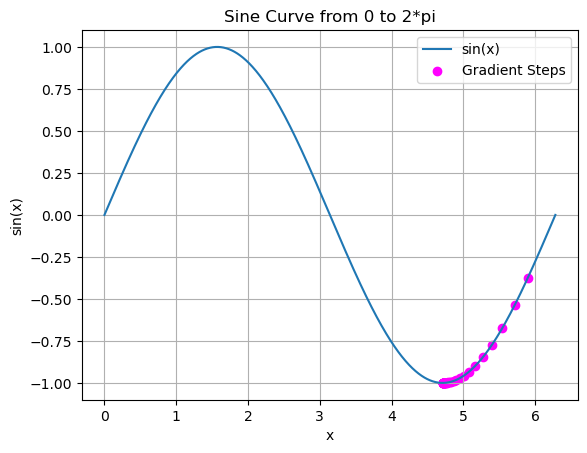

In [12]:
# lets define the derivative 
def g(i):
    return np.cos(i)

# We just want to step through iteratively there: 
def derivative_descent(derivative, alpha = 0.2, w_0 = 5.9, max_iter = 1000):
    W = [w_0]
    i = 0
    while abs(derivative(W[-1])) > 0.001 and i < max_iter:
        w_new = W[-1] - alpha*derivative(W[-1])
        W.append(w_new)
        i += 1
    W = np.array(W)

    return W

vals = derivative_descent(g)
print(vals)

plt.plot(x, y, label='sin(x)')
plt.title('Sine Curve from 0 to 2*pi')
plt.scatter(vals, f(vals), color = "magenta", label = "Gradient Steps")
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.grid(True)
plt.legend()
plt.show()



## Attempting Multivariate Gradient Descent
Ok, let's try a 2-variable trigonometry function to minimize:
$$
z = \sin(x) + \cos(y)
$$



Text(0.5, 0, 'z')

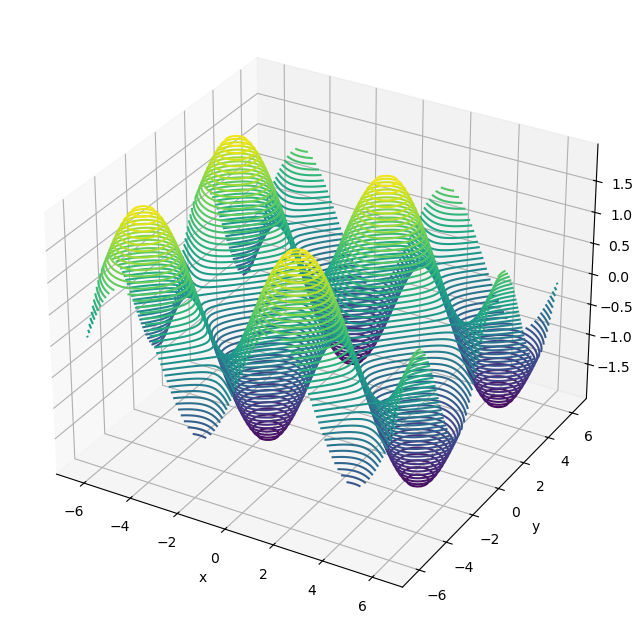

In [15]:
from mpl_toolkits import mplot3d

def h(x_1, x_2):
    return np.sin(x_1) + np.sin(x_2) 

x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = np.linspace(-2*np.pi, 2*np.pi, 100)

X, Y = np.meshgrid(x, y)
Z = h(X, Y)
fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


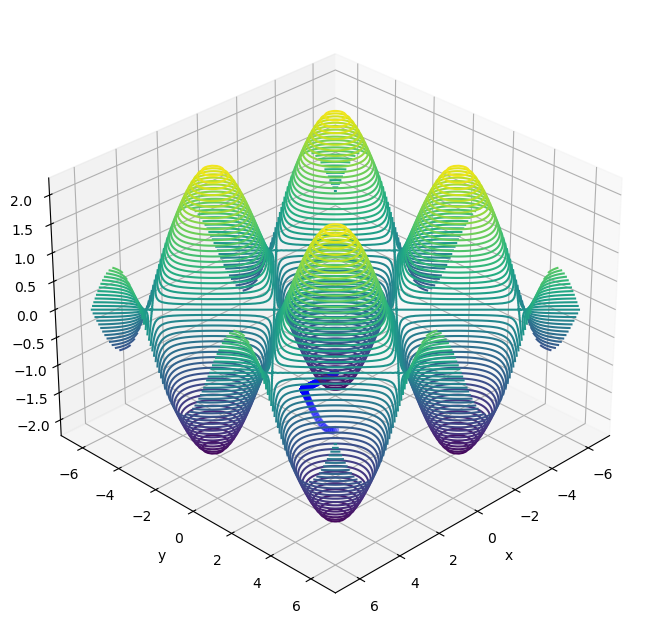

In [23]:
# lets define the partial derivatives, like a jacobian matrix

def dh(w):
    grad = [np.cos(w[0]), -np.sin(w[1])]
    return np.array(grad)

def gradient_descent(derivative, W, alpha = 0.1, max_iter = 1000):
    i = 0
    W_hist = [W]
    while i < max_iter:
        W = W - alpha*derivative(W)
        i += 1
        W_hist.append(W)

    return W_hist


steps = gradient_descent(dh, np.array([np.pi, np.pi]), alpha = 0.1, max_iter=500)

X, Y = np.meshgrid(x, y)
Z = h(X, Y)
fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50)
for i in range(len(steps)):
    ax.scatter3D([steps[i][0]], 
                 [steps[i][1]], 
                 [dh(steps[i])], color = "blue")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=30, azim=45) # adjusting the viewing angle 
